
# **Table of Contents**


1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)<br>
  9.1 [**Conclusion**](#Section91)<br>
  9.2 [**Actionable Insights**](#Section91)<br>

---


<a name = Section1></a>
# **1. Introduction**




- The prices of new cars in the industry is fixed by the manufacturer with some additional costs incurred
  by the government in the form of taxes.So,customers buying a new car can be assured of the money they 
  invest to be worthy.
  
  
- But due to the increased price of new cers and the incapaility of customers to buy new cars due to the
  lack of funds, used cars sales are on a global increase.There is a need for a used car price prediction 
  system to effectively determine the worthiness of the car using a variety of features.
  
  
- Even through there are websites that offers this service, their prediction method may not be the best.
  Besides, different models and systems may contribute on predicting power for a used cars actual market value.
  
  
-  It is important to know their actual market value while both buying and selling.  


<a name = Section2></a>
# **2. Problem Statement**



  
<p align="center"><img src="https://visme.co/blog/wp-content/uploads/2020/06/animated-interactive-infographics-header-wide.gif"></p>
  
  
  
  
  
  
  Identify the factors that  affect the value of a second-hand car, which prompts us to create a car price 
  forecast model in the near future, which may help the buyers to learn the actual market value of a car 
  before buying or selling.
   
  -  Before we create our own car price prediction model, let's understand on what really affects a car's price.
  -  In this notebook, with EDA, we will work to get the solutions for below mentioned business questions.
  
- **Question we will be answering:**  
   
   1.Which is the most popular car brand?
   
   2.Which type of car is most selling?
   
   3.What are the factors affecting the price of cars?
   
   4.What car body type is the most popular?

<a id = Section3></a>
# **3. Installing & Importing Libraries**

In [35]:
!pip install -q datascience                          
!pip install -q pandas-profiling   

In [36]:
!pip install -q --upgrade pandas-profiling       
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd                                                                        

import numpy as np                                                  

import matplotlib.pyplot as plt                                   
import seaborn as sns                                              
%matplotlib inline

import scipy as sp                                                


<a name = Section4></a>
# **4. Data Acquisition & Description**

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|


In [20]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', data.shape)
data.head()

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [21]:
data.describe(include = "all")

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


**Observations:**   We can see all numeric columns having count 9576 except engV. Looks like this column 
has some missing values price and mileage has min value as Zero which is not possible. We need to look into to replace them.

### **Data Information**

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [29]:
data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

**Observations:** We can see that engV and drive columns contains maximum null values.So we have to figure 
              out how to deal with this.


<a name = Section5></a>
# **5. Data Pre-Profiling**

In [32]:
!pip install pandas-profiling --upgrade

In [ ]:
import pandas_profiling 

In [ ]:
profile = data.profile_report(title="Used Cars before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="Used Cars_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing**

**Dataset info:**

-  Number of variables: 10
-  Number of observations: 9576
-  Missing cells: 945 (1.0%)

**Variables types:**

-  Numeric = 4
-  Categorical = 5
-  Boolean = 1


<a name = Section6></a>
# **6. Data Pre-Processing**


   **Handling redundant data**
   
 -  There are 125 duplicate rows, so we will drop them.


In [39]:
data.drop_duplicates(inplace=True)                 #inplace used to modify the dataset with applied command
data.shape

(9463, 10)

In [ ]:
data_cs.replace({'engType': 'Other', 'price': 0, 'mileage': 0}, np.nan, inplace=True)

**Handling missing values**

**price:** Replacing missing values now for price column based on car & model group product and median value of price 
    based on this group.

In [43]:
def get_median_price(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif data_cs.groupby(['car'])['price'].count()[brand] > 0:
        brand_median = data.groupby(['car'])['price'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'price' feature. 
        return data['price'].median() # Otherwise return dataset's median for the 'price' feature.
    
price_median = data.groupby(['car','model'])['price'].apply(get_median_price).reset_index()
price_median.rename(columns={'price': 'price_medn'}, inplace=True)
price_median.head()

,car,model,price_medn
0,Acura,MDX,17200.0
1,Acura,RL,13950.0
2,Acura,TL,8699.0
3,Acura,TLX,38200.0
4,Acura,ZDX,30999.0


In [44]:
def fill_with_median(x):
    if pd.isnull(x['price']):
        return price_median[(price_median['car'] == x['car']) & (price_median['model'] == x['model'])]['price_medn'].values[0]
    else:
        return x['price']
    
data['price'] = data.apply(fill_with_median, axis=1)
data.head()



,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


**engV:** Replacing missing values now for engV column based on car & model group product and median value 
    of engV based on this group.

In [45]:
def get_median_engV(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif data.groupby(['car'])['engV'].count()[brand] > 0:
        brand_median = data.groupby(['car'])['engV'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'engV' feature. 
        return data['engV'].median() # Otherwise return dataset's median for the 'engV' feature.
    
engV_median = data.groupby(['car','model'])['engV'].apply(get_median_engV).reset_index()
engV_median.rename(columns={'engV': 'engV_medn'}, inplace=True)
engV_median.head()

,car,model,engV_medn
0,Acura,MDX,3.7
1,Acura,RL,3.5
2,Acura,TL,3.2
3,Acura,TLX,2.4
4,Acura,ZDX,3.7


In [46]:
def fill_with_median(x):
    if pd.isnull(x['engV']):
        return engV_median[(engV_median['car'] == x['car']) & (engV_median['model'] == x['model'])]['engV_medn'].values[0]
    else:
        return x['engV']
    
data['engV'] = data.apply(fill_with_median, axis=1)
data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.6,Other,yes,2013,E-Class,NaN


**Mileage:** Replacing missing values now for mileage column based on car,model & year group product and median value of mileage based on this group. Year has been included here as per data observations year to year mileage is getting down for the same Car/Brand combination

In [47]:
def get_median_mileage(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif data.groupby(['car'])['mileage'].count()[brand] > 0:
        brand_median = data_cs.groupby(['car'])['mileage'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'mileage' feature. 
        return data['mileage'].median() # Otherwise return dataset's median for the 'mileage' feature.
    
mileage_median = data.groupby(['car','model'])['mileage'].apply(get_median_mileage).reset_index()
mileage_median.rename(columns={'mileage': 'mileage_medn'}, inplace=True)
mileage_median.head()

,car,model,mileage_medn
0,Acura,MDX,85.0
1,Acura,RL,138.0
2,Acura,TL,145.0
3,Acura,TLX,4.0
4,Acura,ZDX,32.0


In [48]:
def fill_with_median(x):
    if pd.isnull(x['mileage']):
        return mileage_median[(mileage_median['car'] == x['car']) & (mileage_median['model'] == x['model'])]['mileage_medn'].values[0]
    else:
        return x['mileage']
    
data['mileage'] = data.apply(fill_with_median, axis=1)
data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.6,Other,yes,2013,E-Class,NaN


In [49]:
def fill_with_median(x):
    if pd.isnull(x['mileage']):
        return mileage_median[(mileage_median['car'] == x['car']) & (mileage_median['model'] == x['model'])]['mileage_medn'].values[0]
    else:
        return x['mileage']
    
data['mileage'] = data.apply(fill_with_median, axis=1)y25gtrefcsx
data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.6,Other,yes,2013,E-Class,NaN


- **Handling categorical data drive:** Replacing missing values now for drive column based on car and model group product and mode value of drive based on this group

In [50]:
def get_drive_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode()        # Return mode for a brand/model if the mode exists.
    elif data.groupby(['car'])['drive'].count()[brand] > 0:
        brand_mode = data.groupby(['car'])['drive'].apply(lambda x: x.mode())[brand]
        return brand_mode      # Return mode of brand if particular brand/model combo has no mode,
    else:                      # but brand itself has a mode for the 'drive' feature. 
        return data['drive'].mode() # Otherwise return dataset's mode for the 'drive' feature.
    
drive_modes = data.groupby(['car','model'])['drive'].apply(get_drive_mode).reset_index().drop('level_2', axis=1)
drive_modes.rename(columns={'drive': 'drive_mode'}, inplace=True)
drive_modes.head()

,car,model,drive_mode
0,Acura,MDX,full
1,Acura,RL,full
2,Acura,TL,front
3,Acura,TLX,front
4,Acura,ZDX,full


In [55]:
def fill_with_mode(x):
    if pd.isnull(x['drive']):
        return drive_modes[(drive_modes['car'] == x['car']) & (drive_modes['model'] == x['model'])]['drive_mode'].values[0]
    else:
        return x['drive']
    
data['drive'] = data.apply(fill_with_mode, axis=1)
data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.6,Other,yes,2013,E-Class,rear


In [56]:
def get_engType_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode() # Return mode for a brand/model if the mode exists.
    elif data.groupby(['car'])['engType'].count()[brand] > 0:
        brand_mode = data.groupby(['car'])['engType'].apply(lambda x: x.mode())[brand]
        return brand_mode # Return mode of brand if particular brand/model combo has no mode,
    else:                 # but brand itself has a mode for the 'engType' feature. 
        return data['engType'].mode() # Otherwise return dataset's mode for the 'engType' feature.
    
engType_modes = data.groupby(['car','model'])['engType'].apply(get_engType_mode).reset_index().drop('level_2', axis=1)
engType_modes.rename(columns={'engType': 'engType_mode'}, inplace=True)
engType_modes.head()

,car,model,engType_mode
0,Acura,MDX,Petrol
1,Acura,RL,Gas
2,Acura,TL,Gas
3,Acura,TLX,Petrol
4,Acura,ZDX,Other


In [57]:
def fill_with_mode(x):
    if pd.isnull(x['engType']):
        return engType_modes[(engType_modes['car'] == x['car']) & (engType_modes['model'] == x['model'])]['engType_mode'].values[0]
    else:
        return x['engType']
    
data['engType'] = data.apply(fill_with_mode, axis=1)
data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.6,Other,yes,2013,E-Class,rear


In [58]:
data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

<a name = Section7></a>
# **7. Data Post-Profiling**

In [ ]:
profile = data_cs.profile_report(title="Used Cars Profiling after Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="Used Cars_profiling_after_preprocessing.html")

**Observations from Pandas Profiling after Data Processing**

**Dataset info:**

-  Number of variables: 9
-  Number of observations: 9463
-  Missing cells: 0


<a name = Section8></a>
# **8. Exploratory Data Analysis**


Text(0.5, 1.0, 'Top 10 car brands on sale')

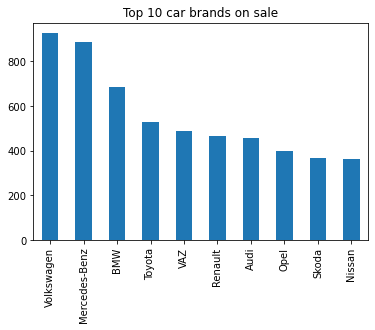

In [70]:
data.car.value_counts().head(10).plot.bar()
plt.title("Top 10 car brands on sale")

This shows Volkswagen and Mercedes-Benz are top most brands on sale and hence these would be preferred choices.

Text(0.5, 1.0, 'Most preferred body type used in 1953-2016')

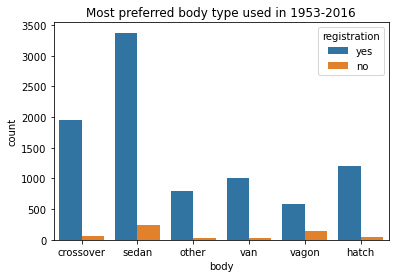

In [71]:
sns.countplot(x='body', data=data, orient='h', hue='registration')
plt.title("Most preferred body type used in 1953-2016")

Text(0.5, 1.0, 'Most preferred body type')

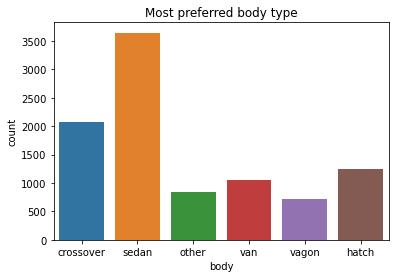

In [72]:
sns.countplot(x='body', data=data_cs, orient='h')
plt.title("Most preferred body type")

This shows the car brands having "sedan" type of body having maximum registration/sale over the years.

Text(0.5, 1.0, 'Most preferred engType used over the years')

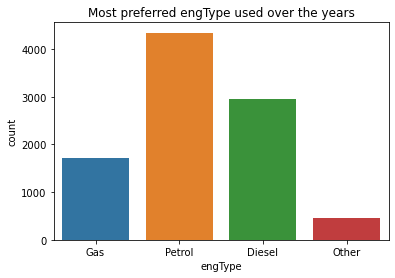

In [75]:
sns.countplot(x='engType', data=data, orient='h')
plt.title("Most preferred engType used over the years")

-  Petrol Engine is most prefererd

Text(0.5, 1.0, 'Car sold as per drive')

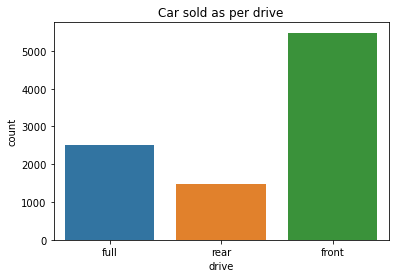

In [76]:
sns.countplot(x='drive', data=data, orient='h')
plt.title("Car sold as per drive")

-  Front drive is most preferrred type.

Text(0.5, 1.0, 'year - price lineplot (1950 - 2010)')

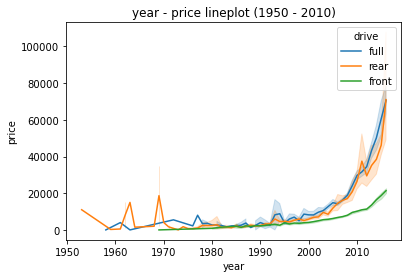

In [77]:
sns.lineplot(data=data, y='price', x='year', hue='drive')
plt.title("year - price lineplot (1950 - 2010)")

Text(0.5, 1.0, 'History of car sales in a year')

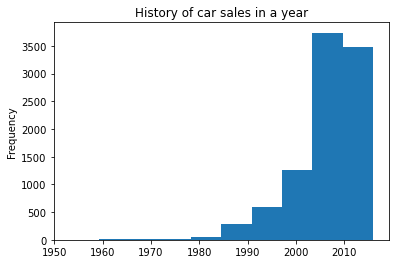

In [78]:
data['year'].plot.hist(bins = 10) 
plt.title("History of car sales in a year")

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

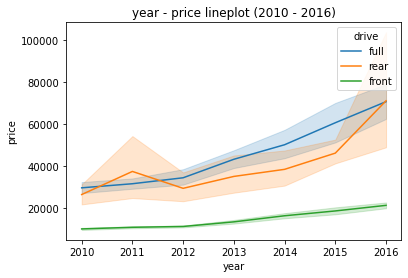

In [80]:
sns.lineplot(data=data[data.year >= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (2010 - 2016)")

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

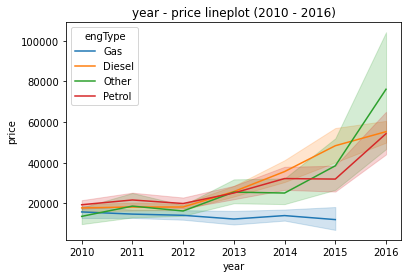

In [82]:
sns.lineplot(data=data[data.year >= 2010], y='price', x='year', hue='engType')
plt.title("year - price lineplot (2010 - 2016)")

Text(0.5, 1.0, 'Heatmap for Highest correlated features for Carsale datset')

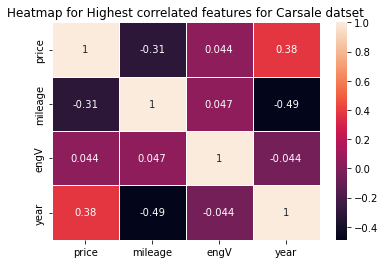

In [83]:
sns.heatmap(data.corr(),annot=True, linewidths=.5)
plt.title("Heatmap for Highest correlated features for Carsale datset")

Text(0.5, 1.0, 'Price distribution over the year')

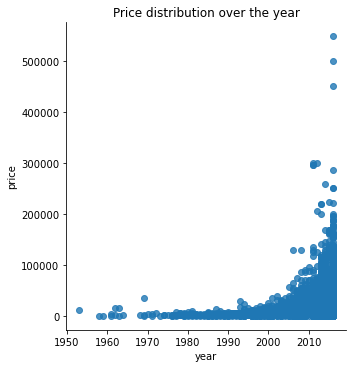

In [84]:
sns.lmplot('year','price', data, fit_reg=False)
plt.title("Price distribution over the year")

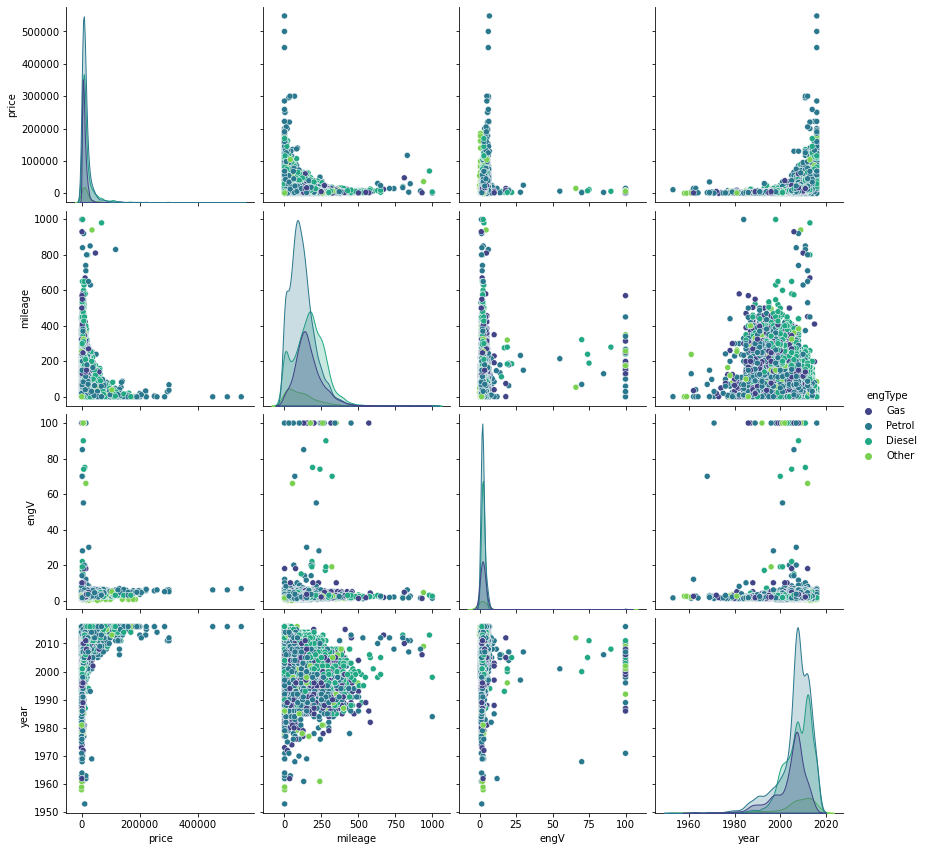

In [85]:
sns.pairplot(data, hue='engType', palette="viridis", height=3)

<AxesSubplot:xlabel='drive', ylabel='mileage'>

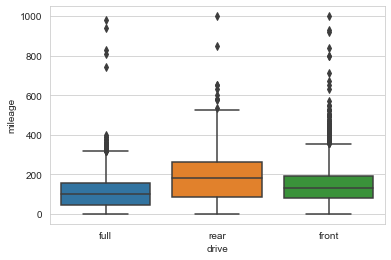

In [86]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'drive', y = 'mileage', data = data) 

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**


-  With the help of notebook we can learn how exploratory data analysis can be carried out using Pandas plotting.

-  Also we have seen making use of packages like matplotlib and seaborn to develop better insights about the data.

-  We have also seen how preproceesing helps in dealing with missing values and irregualities present in the data.

-  We also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.

-  We have seen the impact of columns like mileage, year and engType on the Price increase/decrease rate.

1. Which brand of cars is most selling brand ?

 -  From above analysis we can conclude that ,Volkswagen and Mercedes-Benz are top most brands on sale and hence these would be preferred choices.
 
 
2. which type of cars are more selling?

 -  "sedan" type of body having maximum registration/sale over the years. This shows People prefers sedan type of body mostly and hence this information can be use for achieving max sale and to figure out production of units.
 
 
3. What are the factors affecting the price of cars?

 -  Price changing accordingly based on mileage value, So price is varying based on mileage too and this should be consider as a factor for the calculation

 -  Petrol engine type is preferred over diesel & gas.
 
 
4. What car body type is the most popular 
 -  The car brands having "sedan" type of car body having maximum registration/sale over the years.
   
 

<a name = Section92></a>
### **9.2 Actionable Insights**

 -  To increase the sale of cars, price range should be less than 15K.
 -  Procure sedan cars having petrol engine and front drive as these are having more demand.
 -  Less preferred cars or too old cars should be Liquidated by giving some discounts so that stock can be cleared.
 -  Provision to make non registered vehicles registered will boost sale.
 -  Less acceptance to gas engine, so those cars can be converted to diesel/petrol engine.